<a href="https://colab.research.google.com/github/dilakuyucu7/DSA210-Fall24-Flashcards-Project/blob/main/EDA_on_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#this file is for accuracy rate calculation and general correctness analysis per language
#and spearman and pearson heatmaps for each language

Correct Answers Distribution:
Correct answers
6     4
7     3
9     7
10    3
11    4
12    1
13    4
15    2
16    4
17    4
Name: count, dtype: int64

Incorrect Answers Distribution:
Incorrect answers
0    20
1    14
2     1
3     1
Name: count, dtype: int64

Average Accuracy Rate Per Word:
Word
bedeuten          0.900000
benutzen          1.000000
bereits           0.937500
bestrafen         0.875000
das Feuer         1.000000
das Regal         0.909091
der Rücken        1.000000
der Traum         1.000000
der Wald          1.000000
der Wortschatz    0.900000
die Ahnung        0.900000
die Hitze         1.000000
die Seele         1.000000
die Seife         0.875000
die Zunge         1.000000
einfach           0.937500
empfehlen         0.900000
erzählen          0.916667
etwas             1.000000
ganz              0.846154
gestern           1.000000
glauben           1.000000
hoffen            0.875000
jeder             1.000000
laufen            1.000000
leer              1.000000

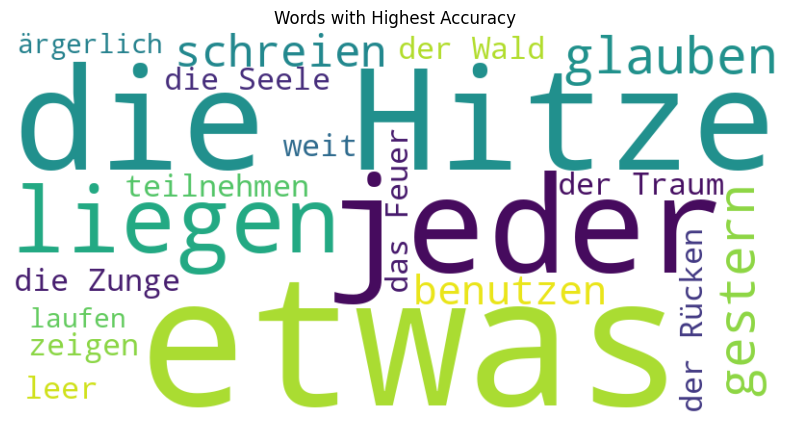

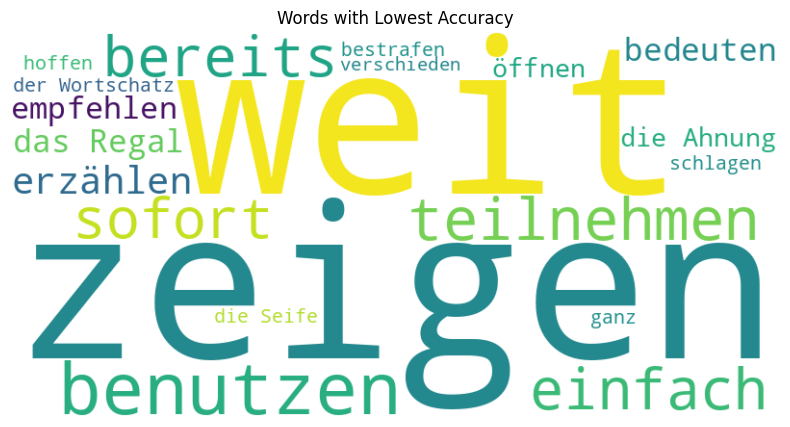

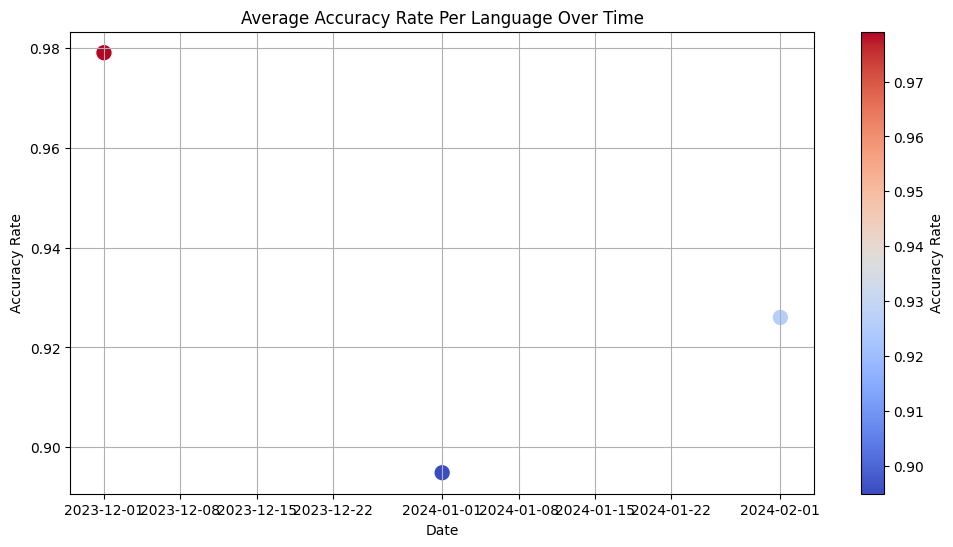

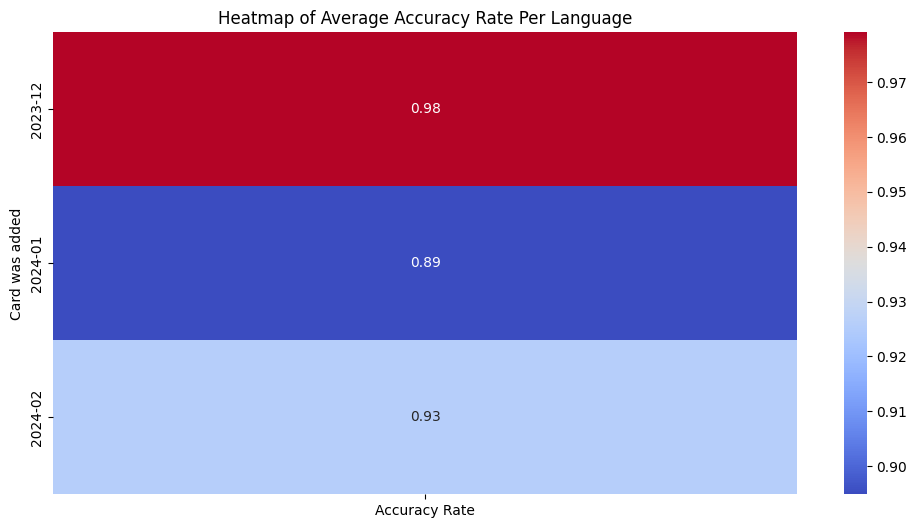

In [3]:
import pandas as pd      #german
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset
file_path = '/content/deu_full_progress_data.csv'
data = pd.read_csv(file_path)

# Convert the 'Card was added' column to datetime format (DD/MM/YY)
data['Card was added'] = pd.to_datetime(data['Card was added'], format='%d/%m/%y', errors='coerce')

# Ensure numeric columns are converted correctly
data['Correct answers'] = pd.to_numeric(data['Correct answers'], errors='coerce')
data['Incorrect answers'] = pd.to_numeric(data['Incorrect answers'], errors='coerce')

# Calculate accuracy rate per word and language
data['Accuracy Rate'] = data['Correct answers'] / (data['Correct answers'] + data['Incorrect answers'])

# Correct and Incorrect Answers Distribution
correct_distribution = data['Correct answers'].value_counts().sort_index()
incorrect_distribution = data['Incorrect answers'].value_counts().sort_index()

# Average accuracy rate per word and language
average_accuracy_per_word = data.groupby('Word')['Accuracy Rate'].mean()
average_accuracy_per_language = data.groupby(data['Card was added'].dt.to_period('M'))['Accuracy Rate'].mean()

# Identify words with highest and lowest accuracy
words_highest_accuracy = average_accuracy_per_word.sort_values(ascending=False).head(20)
words_lowest_accuracy = average_accuracy_per_word.sort_values(ascending=True).head(20)

# Print all results
print('Correct Answers Distribution:')
print(correct_distribution)
print('\nIncorrect Answers Distribution:')
print(incorrect_distribution)
print('\nAverage Accuracy Rate Per Word:')
print(average_accuracy_per_word)
print('\nAverage Accuracy Rate Per Language:')
print(average_accuracy_per_language)
print('\nWords with Highest Accuracy:')
print(words_highest_accuracy)
print('\nWords with Lowest Accuracy:')
print(words_lowest_accuracy)

# Word Cloud Visualization for Highest and Lowest Accuracy
wordcloud_high = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_highest_accuracy)
wordcloud_low = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_lowest_accuracy)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.title("Words with Highest Accuracy")
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Words with Lowest Accuracy")
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis('off')
plt.show()

# Scatter Plot for Average Accuracy Rate Per Language
plt.figure(figsize=(12, 6))
plt.scatter(average_accuracy_per_language.index.to_timestamp(), average_accuracy_per_language.values, c=average_accuracy_per_language.values, cmap='coolwarm', s=100)
plt.colorbar(label='Accuracy Rate')
plt.title('Average Accuracy Rate Per Language Over Time')
plt.xlabel('Date')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()

# Heatmap for Accuracy Rate Per Language
import seaborn as sns
plt.figure(figsize=(12, 6))
avg_acc_df = average_accuracy_per_language.reset_index()
heatmap_data = avg_acc_df.pivot_table(values='Accuracy Rate', index='Card was added')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Heatmap of Average Accuracy Rate Per Language')
plt.show()


<ipython-input-7-6c46b91c425e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_words['Accuracy Rate'] = studied_words['Correct answers'] / (studied_words['Correct answers'] + studied_words['Incorrect answers'])


Number of unstudied words: 26


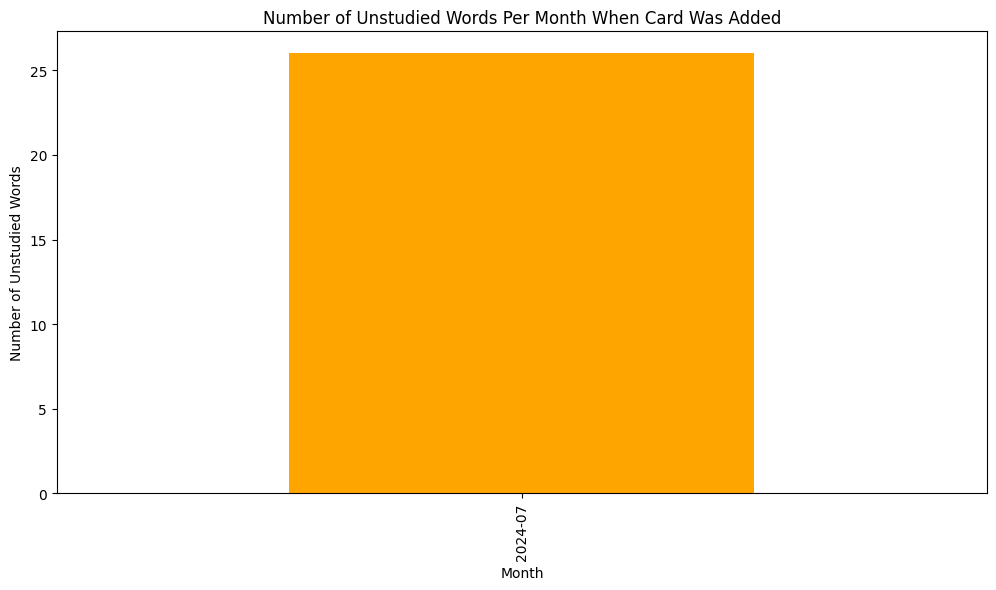

Correct Answers Distribution:
Correct answers
0.0      3
1.0     11
2.0     15
3.0     26
4.0      8
5.0      4
7.0      2
8.0      4
10.0     2
11.0     4
12.0     5
15.0     9
16.0     4
17.0     6
18.0     3
Name: count, dtype: int64

Incorrect Answers Distribution:
Incorrect answers
0.0    73
1.0    20
2.0    11
3.0     1
4.0     1
Name: count, dtype: int64

Average Accuracy Rate Per Word (Limited to 30 Words):
Word
가죽      0.500000
간절하다    0.666667
감추다     0.666667
결산      1.000000
계약      0.714286
고요하다    0.944444
곱슬머리    1.000000
과학자     0.666667
관객      1.000000
관리하다    1.000000
광고      1.000000
교시      1.000000
국기      0.800000
극복하다    1.000000
근무하다    1.000000
긍정적     1.000000
기술      1.000000
기적      1.000000
기준      1.000000
길모퉁이    0.600000
길이      1.000000
날카롭다    1.000000
노 젓다    1.000000
대통령     0.944444
독수리     0.500000
동의하다    1.000000
따로      1.000000
면도하다    1.000000
명령하다    0.571429
목적지     1.000000
Name: Accuracy Rate, dtype: float64

Average Accuracy Rate Per Lan

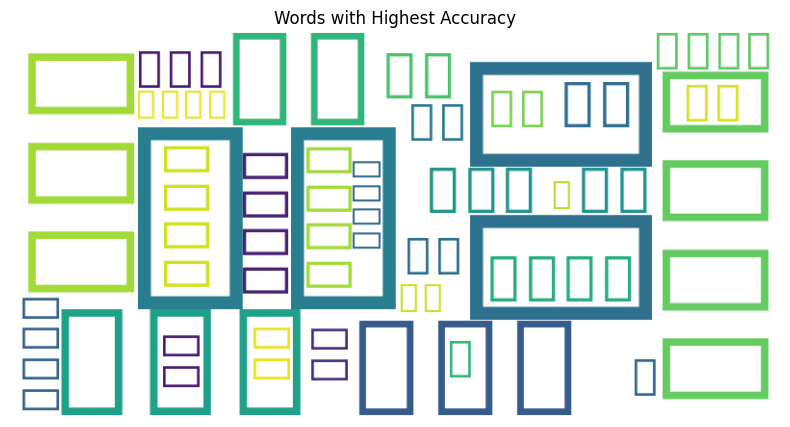

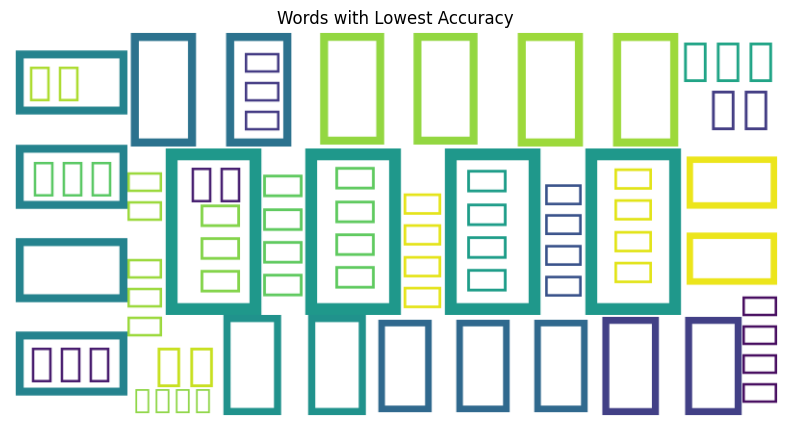

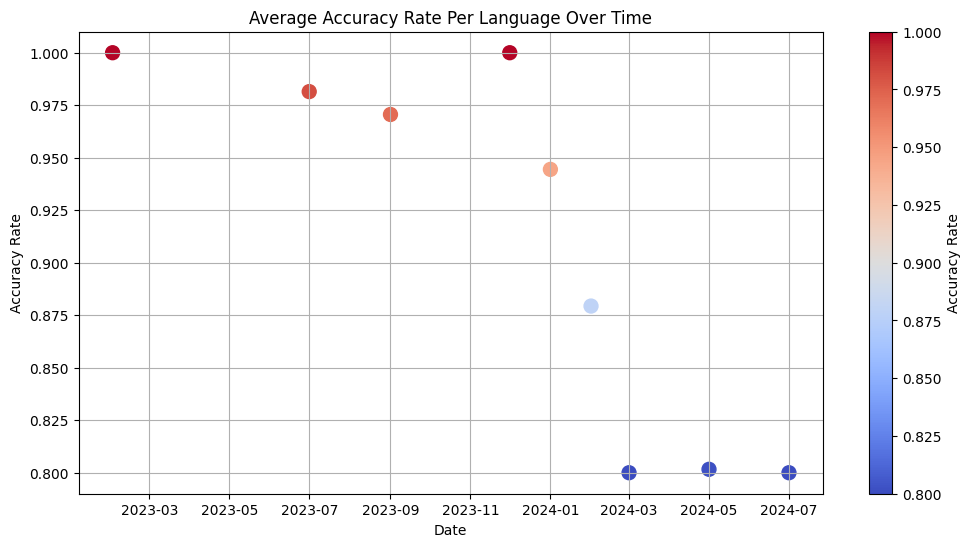

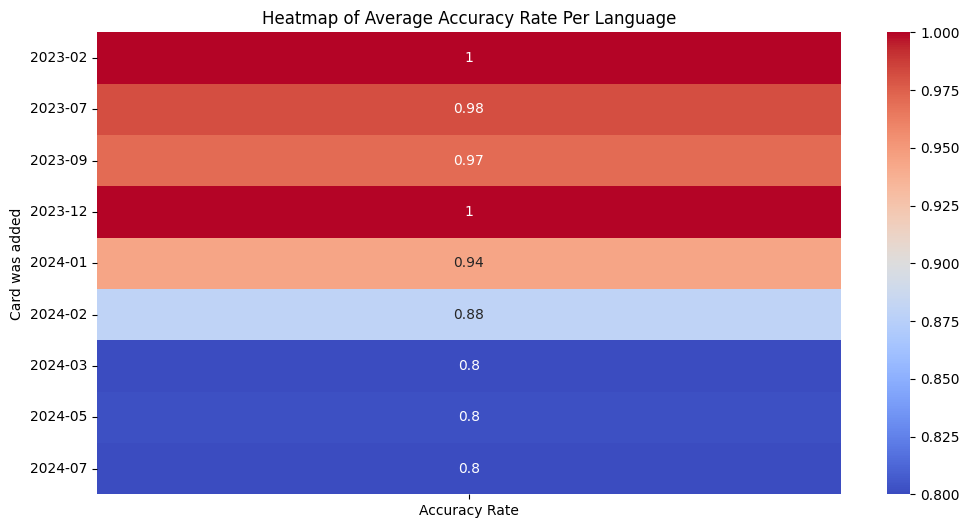

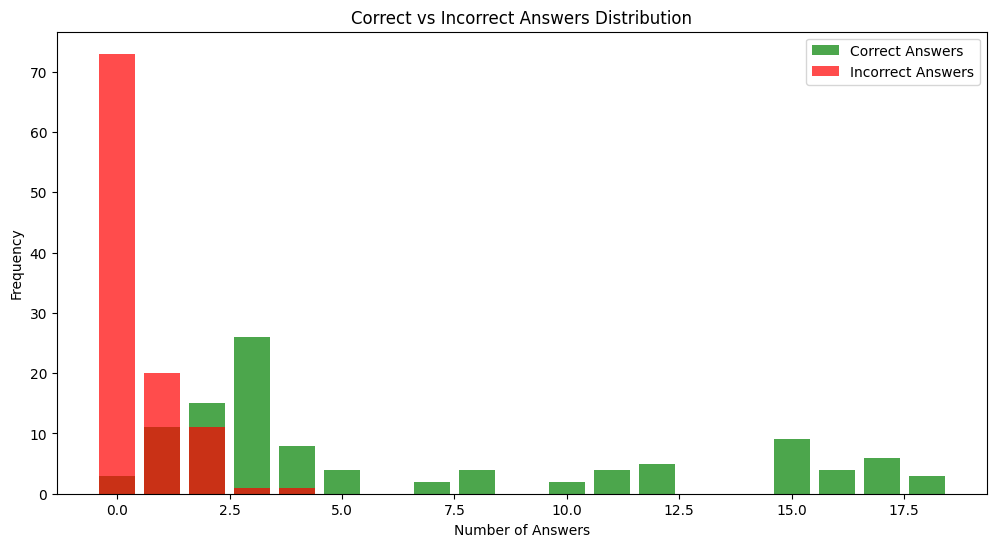

In [7]:
import pandas as pd      #korean
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load the dataset
file_path = '/content/progress_log_kr_cleaned (1).csv'
data = pd.read_csv(file_path)

# Convert the 'Card was added' column to datetime format (DD/MM/YY)
data['Card was added'] = pd.to_datetime(data['Card was added'], format='%d/%m/%y', errors='coerce')

# Ensure numeric columns are converted correctly
data['Correct answers'] = pd.to_numeric(data['Correct answers'], errors='coerce')
data['Incorrect answers'] = pd.to_numeric(data['Incorrect answers'], errors='coerce')
data['Studied'] = pd.to_numeric(data['Studied'], errors='coerce')

# Filter out rows where 'Studied' is 0
unstudied_words = data[data['Studied'] == 0]
studied_words = data[data['Studied'] > 0]

# Calculate accuracy rate only for studied words
studied_words['Accuracy Rate'] = studied_words['Correct answers'] / (studied_words['Correct answers'] + studied_words['Incorrect answers'])

# Correct and Incorrect Answers Distribution
correct_distribution = studied_words['Correct answers'].value_counts().sort_index()
incorrect_distribution = studied_words['Incorrect answers'].value_counts().sort_index()

# Average accuracy rate per word and language
average_accuracy_per_word = studied_words.groupby('Word')['Accuracy Rate'].mean()
average_accuracy_per_language = studied_words.groupby(studied_words['Card was added'].dt.to_period('M'))['Accuracy Rate'].mean()

# Identify words with highest and lowest accuracy (limiting to 30 words)
words_highest_accuracy = average_accuracy_per_word.sort_values(ascending=False).head(30)
words_lowest_accuracy = average_accuracy_per_word.sort_values(ascending=True).head(30)

# Print the number of unstudied words
print(f"Number of unstudied words: {len(unstudied_words)}")

# Plot the number of unstudied words by month
unstudied_by_month = unstudied_words.groupby(unstudied_words['Card was added'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
unstudied_by_month.plot(kind='bar', color='orange')
plt.title('Number of Unstudied Words Per Month When Card Was Added')
plt.xlabel('Month')
plt.ylabel('Number of Unstudied Words')
plt.show()

# Print all results
print('Correct Answers Distribution:')
print(correct_distribution)
print('\nIncorrect Answers Distribution:')
print(incorrect_distribution)
print('\nAverage Accuracy Rate Per Word (Limited to 30 Words):')
print(average_accuracy_per_word.head(30))
print('\nAverage Accuracy Rate Per Language:')
print(average_accuracy_per_language)
print('\nWords with Highest Accuracy:')
print(words_highest_accuracy)
print('\nWords with Lowest Accuracy:')
print(words_lowest_accuracy)

# Word Cloud Visualization for Highest and Lowest Accuracy (Increased to 35 Words)
wordcloud_high = WordCloud(width=800, height=400, background_color='white', max_words=35).generate_from_frequencies(words_highest_accuracy)
wordcloud_low = WordCloud(width=800, height=400, background_color='white', max_words=35).generate_from_frequencies(words_lowest_accuracy)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.title("Words with Highest Accuracy")
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Words with Lowest Accuracy")
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis('off')
plt.show()

# Scatter Plot for Average Accuracy Rate Per Language
plt.figure(figsize=(12, 6))
plt.scatter(average_accuracy_per_language.index.to_timestamp(), average_accuracy_per_language.values, c=average_accuracy_per_language.values, cmap='coolwarm', s=100)
plt.colorbar(label='Accuracy Rate')
plt.title('Average Accuracy Rate Per Language Over Time')
plt.xlabel('Date')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()

# Heatmap for Accuracy Rate Per Language
plt.figure(figsize=(12, 6))
avg_acc_df = average_accuracy_per_language.reset_index()
heatmap_data = avg_acc_df.pivot_table(values='Accuracy Rate', index='Card was added')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Heatmap of Average Accuracy Rate Per Language')
plt.show()

# Bar Plot for Correct and Incorrect Answers Together
plt.figure(figsize=(12, 6))
plt.bar(correct_distribution.index, correct_distribution.values, label='Correct Answers', color='green', alpha=0.7)
plt.bar(incorrect_distribution.index, incorrect_distribution.values, label='Incorrect Answers', color='red', alpha=0.7)
plt.title('Correct vs Incorrect Answers Distribution')
plt.xlabel('Number of Answers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


<ipython-input-8-eb8082143428>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  studied_words['Accuracy Rate'] = studied_words['Correct answers'] / (studied_words['Correct answers'] + studied_words['Incorrect answers'])


Number of unstudied words: 109


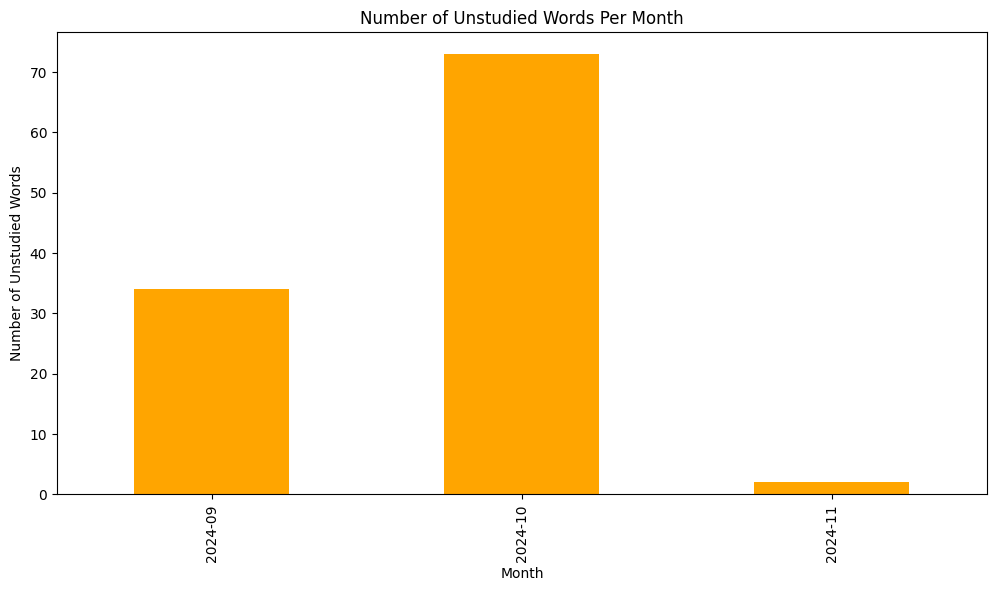

Correct Answers Distribution:
Correct answers
0.0      11
1.0     366
2.0      17
3.0     428
4.0      72
5.0      27
6.0      46
7.0      25
8.0       8
9.0       9
10.0     53
11.0     95
12.0    169
13.0     27
14.0     15
15.0      2
20.0      1
Name: count, dtype: int64

Incorrect Answers Distribution:
Incorrect answers
0.0    710
1.0    432
2.0    134
3.0     59
4.0     22
5.0     10
6.0      4
Name: count, dtype: int64

Average Accuracy Rate Per Word (Limited to 30 Words):
Word
(in)dietro           0.750000
Lei                  1.000000
Natale               1.000000
a causa di           1.000000
a malapena           0.600000
a più tardi          1.000000
a proposito          1.000000
a proposito di...    0.500000
a questo punto       0.333333
a volte              1.000000
abbastanza           0.666667
abbinare             0.200000
abbraccio            1.000000
abitante             1.000000
abitare              1.000000
abito                1.000000
abituali             1.000000


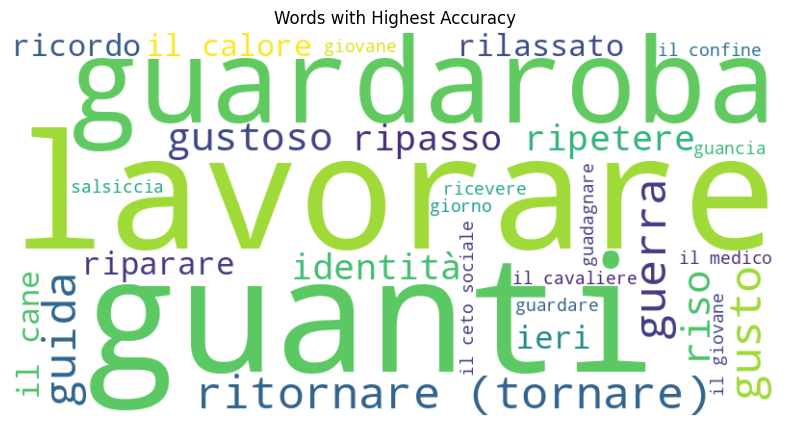

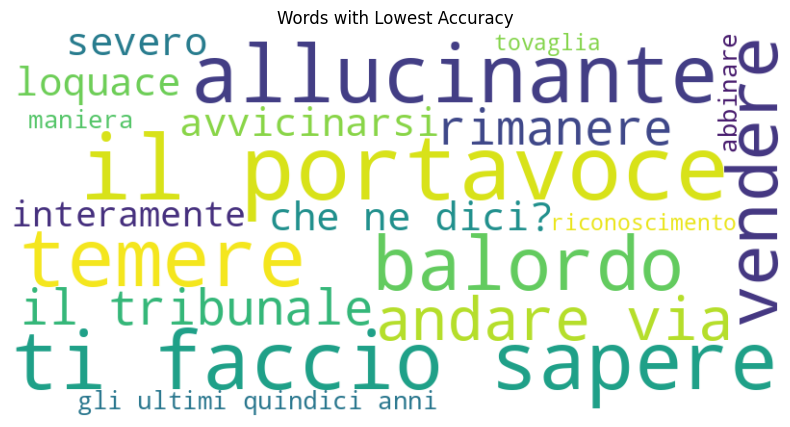

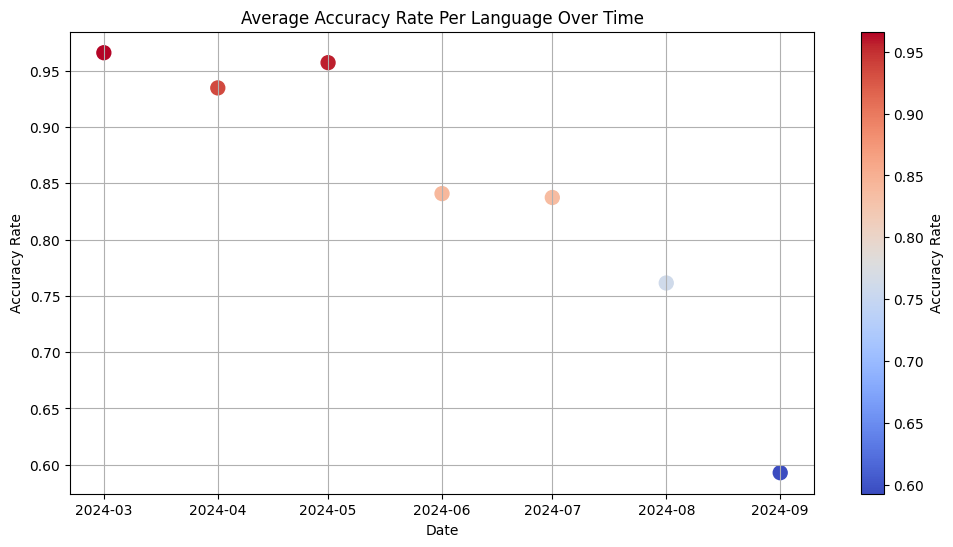

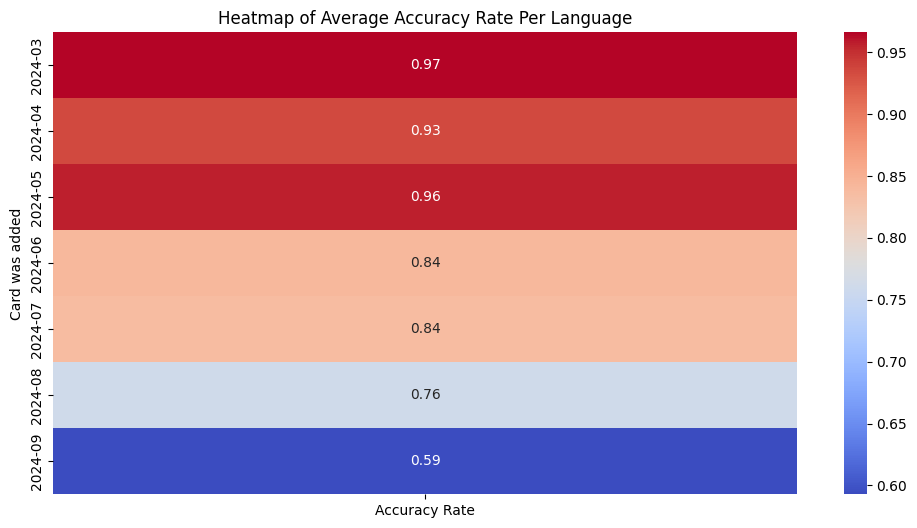

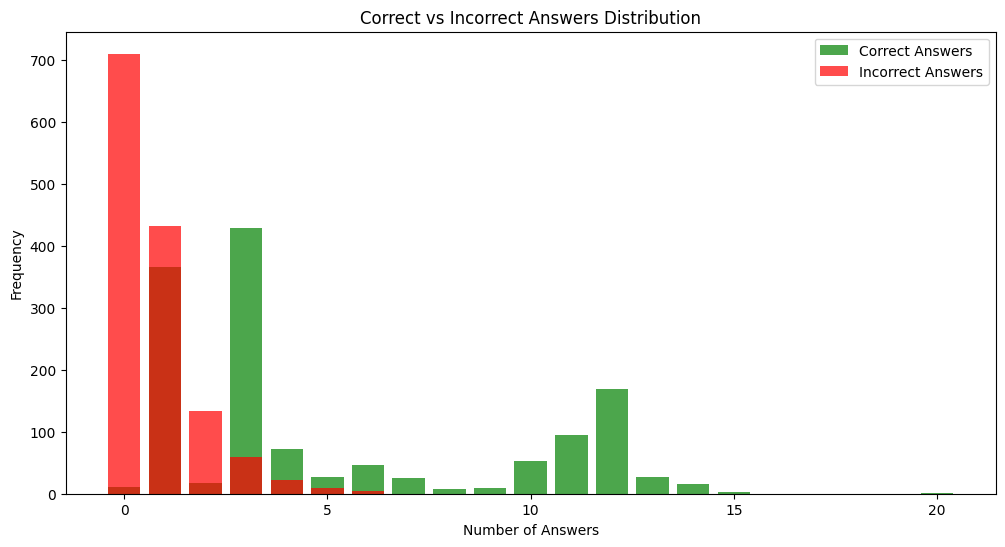

In [8]:
import pandas as pd         #italian
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Load the dataset
file_path = '/content/merged_ita_data.csv'
data = pd.read_csv(file_path)

# Convert the 'Card was added' column to datetime format (DD/MM/YY)
data['Card was added'] = pd.to_datetime(data['Card was added'], format='%d/%m/%y', errors='coerce')

# Ensure numeric columns are converted correctly
data['Correct answers'] = pd.to_numeric(data['Correct answers'], errors='coerce')
data['Incorrect answers'] = pd.to_numeric(data['Incorrect answers'], errors='coerce')
data['Studied'] = pd.to_numeric(data['Studied'], errors='coerce')

# Filter out rows where 'Studied' is 0
unstudied_words = data[data['Studied'] == 0]
studied_words = data[data['Studied'] > 0]

# Calculate accuracy rate only for studied words
studied_words['Accuracy Rate'] = studied_words['Correct answers'] / (studied_words['Correct answers'] + studied_words['Incorrect answers'])

# Correct and Incorrect Answers Distribution
correct_distribution = studied_words['Correct answers'].value_counts().sort_index()
incorrect_distribution = studied_words['Incorrect answers'].value_counts().sort_index()

# Average accuracy rate per word and language
average_accuracy_per_word = studied_words.groupby('Word')['Accuracy Rate'].mean()
average_accuracy_per_language = studied_words.groupby(studied_words['Card was added'].dt.to_period('M'))['Accuracy Rate'].mean()

# Identify words with highest and lowest accuracy (limiting to 30 words)
words_highest_accuracy = average_accuracy_per_word.sort_values(ascending=False).head(30)
words_lowest_accuracy = average_accuracy_per_word.sort_values(ascending=True).head(30)

# Print the number of unstudied words
print(f"Number of unstudied words: {len(unstudied_words)}")

# Plot the number of unstudied words by month
unstudied_by_month = unstudied_words.groupby(unstudied_words['Card was added'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
unstudied_by_month.plot(kind='bar', color='orange')
plt.title('Number of Unstudied Words Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Unstudied Words')
plt.show()

# Print all results
print('Correct Answers Distribution:')
print(correct_distribution)
print('\nIncorrect Answers Distribution:')
print(incorrect_distribution)
print('\nAverage Accuracy Rate Per Word (Limited to 30 Words):')
print(average_accuracy_per_word.head(30))
print('\nAverage Accuracy Rate Per Language:')
print(average_accuracy_per_language)
print('\nWords with Highest Accuracy:')
print(words_highest_accuracy)
print('\nWords with Lowest Accuracy:')
print(words_lowest_accuracy)

# Word Cloud Visualization for Highest and Lowest Accuracy (Increased to 35 Words)
wordcloud_high = WordCloud(width=800, height=400, background_color='white', max_words=35).generate_from_frequencies(words_highest_accuracy)
wordcloud_low = WordCloud(width=800, height=400, background_color='white', max_words=35).generate_from_frequencies(words_lowest_accuracy)

# Display the word clouds
plt.figure(figsize=(10, 5))
plt.title("Words with Highest Accuracy")
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Words with Lowest Accuracy")
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.axis('off')
plt.show()

# Scatter Plot for Average Accuracy Rate Per Language
plt.figure(figsize=(12, 6))
plt.scatter(average_accuracy_per_language.index.to_timestamp(), average_accuracy_per_language.values, c=average_accuracy_per_language.values, cmap='coolwarm', s=100)
plt.colorbar(label='Accuracy Rate')
plt.title('Average Accuracy Rate Per Language Over Time')
plt.xlabel('Date')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()

# Heatmap for Accuracy Rate Per Language
plt.figure(figsize=(12, 6))
avg_acc_df = average_accuracy_per_language.reset_index()
heatmap_data = avg_acc_df.pivot_table(values='Accuracy Rate', index='Card was added')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Heatmap of Average Accuracy Rate Per Language')
plt.show()

# Bar Plot for Correct and Incorrect Answers Together
plt.figure(figsize=(12, 6))
plt.bar(correct_distribution.index, correct_distribution.values, label='Correct Answers', color='green', alpha=0.7)
plt.bar(incorrect_distribution.index, incorrect_distribution.values, label='Incorrect Answers', color='red', alpha=0.7)
plt.title('Correct vs Incorrect Answers Distribution')
plt.xlabel('Number of Answers')
plt.ylabel('Frequency')
plt.legend()
plt.show()


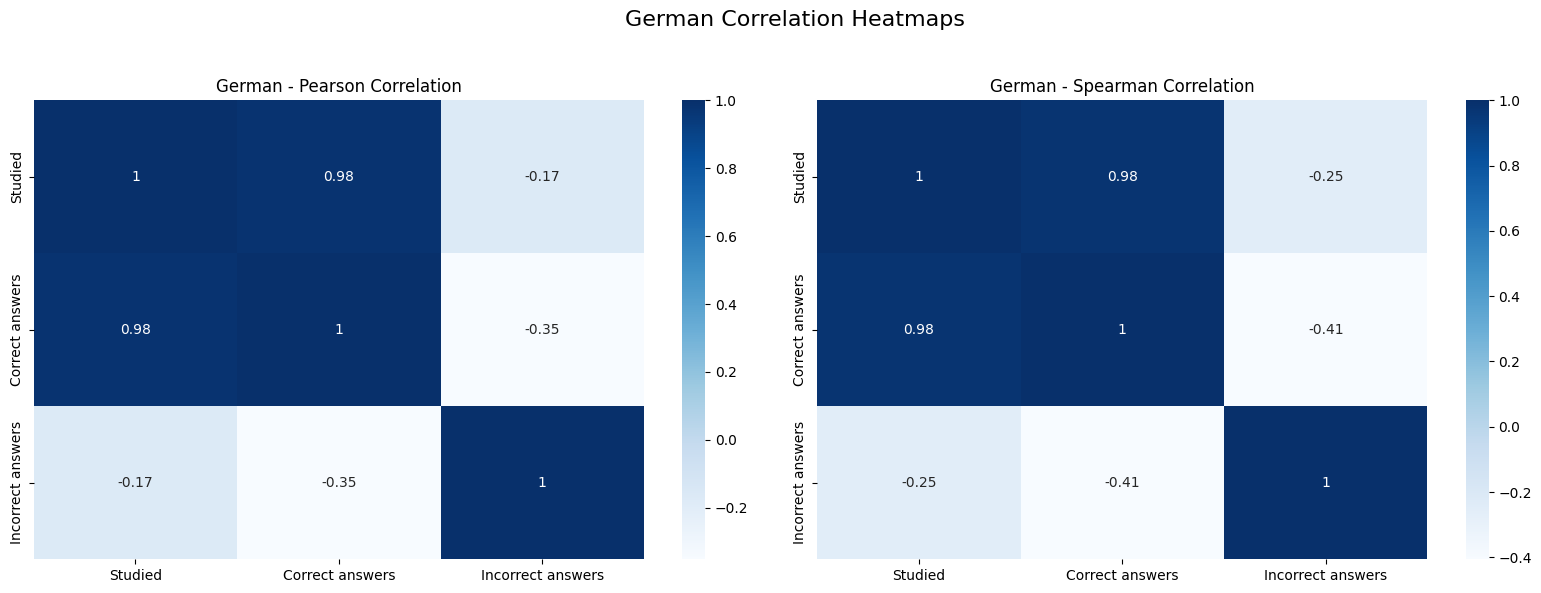

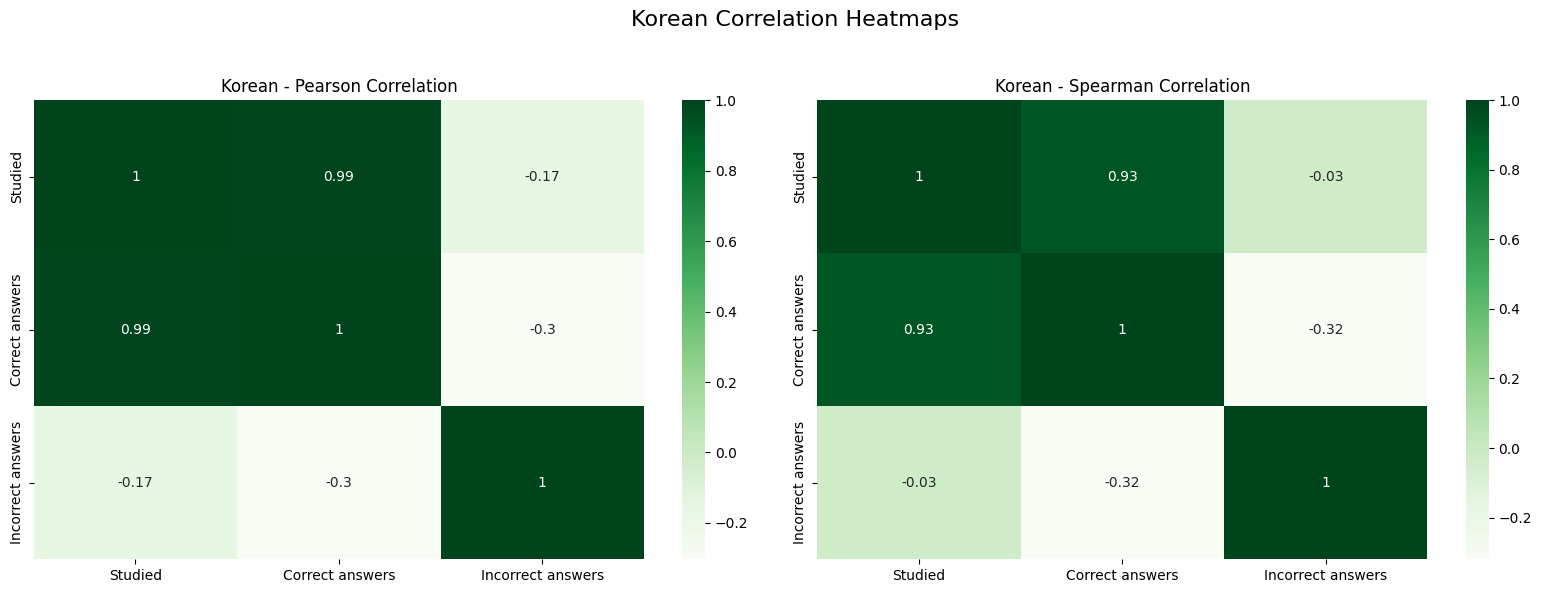

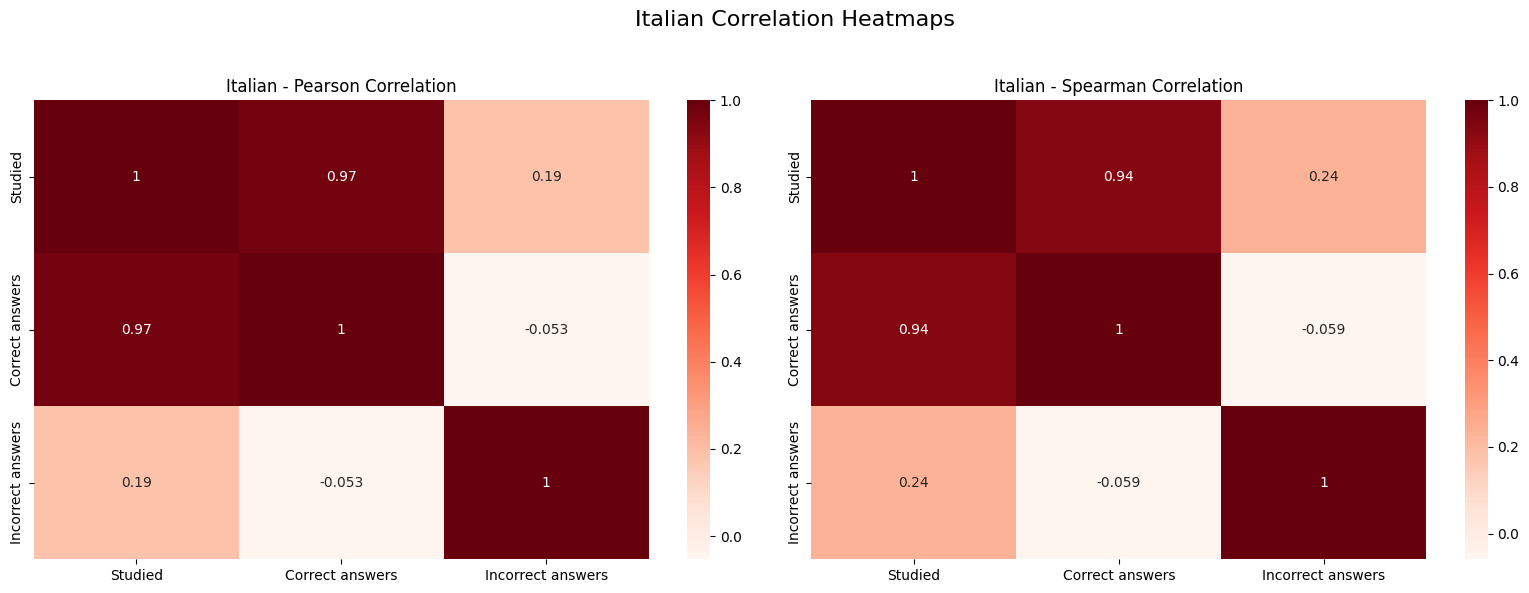

In [11]:
import pandas as pd       #pearson and spearman correlations
import matplotlib.pyplot as plt
import seaborn as sns

# File paths (replace these with your actual file paths in Colab)
german_file = '/content/deu_full_progress_data.csv'
korean_file = '/content/progress_log_kr_cleaned (1).csv'
italian_file = '/content/merged_ita_data.csv'

# Define a function to calculate and plot Pearson and Spearman heatmaps
def plot_correlation_heatmaps(file_path, language, color_scheme):
    # Load the data
    data = pd.read_csv(file_path)

    # Convert relevant columns to numeric
    data['Studied'] = pd.to_numeric(data['Studied'], errors='coerce')
    data['Correct answers'] = pd.to_numeric(data['Correct answers'], errors='coerce')
    data['Incorrect answers'] = pd.to_numeric(data['Incorrect answers'], errors='coerce')

    # Filter for studied words only
    filtered_data = data[data['Studied'] > 0]

    # Calculate Pearson and Spearman correlations
    pearson_corr = filtered_data[['Studied', 'Correct answers', 'Incorrect answers']].corr(method='pearson')
    spearman_corr = filtered_data[['Studied', 'Correct answers', 'Incorrect answers']].corr(method='spearman')

    # Plot heatmaps for Pearson and Spearman correlations
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'{language} Correlation Heatmaps', fontsize=16)

    sns.heatmap(pearson_corr, annot=True, cmap=color_scheme, ax=axes[0])
    axes[0].set_title(f'{language} - Pearson Correlation')

    sns.heatmap(spearman_corr, annot=True, cmap=color_scheme, ax=axes[1])
    axes[1].set_title(f'{language} - Spearman Correlation')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot for German
plot_correlation_heatmaps(german_file, 'German', 'Blues')

# Plot for Korean
plot_correlation_heatmaps(korean_file, 'Korean', 'Greens')

# Plot for Italian
plot_correlation_heatmaps(italian_file, 'Italian', 'Reds')
